In [114]:
import numpy as np
import sklearn
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
df = pd.read_csv('Preprocessed_data.csv')

In [116]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [117]:
df['type'].unique()

array([ 0,  6,  4, 11, 10,  2,  5,  3,  9,  7,  8,  1])

In [118]:
df.drop(df.index[df['type'] == 10], inplace = True)

In [119]:
df.drop(df.index[df['type'] == 2], inplace = True)

In [120]:
df.drop(df.index[df['type'] == 9], inplace = True)

In [121]:
df.drop(df.index[df['type'] == 3], inplace = True)

In [122]:
df.drop(df.index[df['type'] == 5], inplace = True)

In [123]:
df.drop(df.index[df['type'] == 8], inplace = True)

In [124]:
df.drop(df.index[df['type'] == 7], inplace = True)

In [125]:
df.drop(df.index[df['type'] == 1], inplace = True)

In [126]:
# using np.ceil to round to
df['baths']=df['baths'].apply(np.ceil)

In [127]:
df['type'].unique()

array([ 0,  6,  4, 11])

In [128]:
df.head()

,price,type,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1345,0,834,1,1.0,1,0,0,0,1,4,10,1
1,1600,6,3537,4,3.0,0,0,0,0,3,0,10,0
2,1205,0,1299,2,2.0,1,0,0,0,3,4,10,1
3,1205,0,1299,2,2.0,1,0,0,0,3,4,10,1
4,1245,0,1299,2,2.0,1,0,0,0,3,4,10,1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111166 entries, 0 to 116038
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    111166 non-null  int64  
 1   type                     111166 non-null  int64  
 2   sqfeet                   111166 non-null  int64  
 3   beds                     111166 non-null  int64  
 4   baths                    111166 non-null  float64
 5   smoking_allowed          111166 non-null  int64  
 6   wheelchair_access        111166 non-null  int64  
 7   electric_vehicle_charge  111166 non-null  int64  
 8   comes_furnished          111166 non-null  int64  
 9   laundry_options          111166 non-null  int64  
 10  parking_options          111166 non-null  int64  
 11  state                    111166 non-null  int64  
 12  pets_allowed             111166 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 11.9 MB


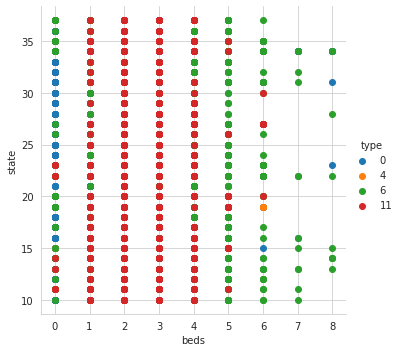

In [130]:
#Scatter Plot using the seaborn library
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='type', height=5) \
.map(plt.scatter, "beds", "state") \
.add_legend();
plt.show()

In [131]:
x_data = df.drop(['type'],axis=1)
x_data.head()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
0,1345,834,1,1.0,1,0,0,0,1,4,10,1
1,1600,3537,4,3.0,0,0,0,0,3,0,10,0
2,1205,1299,2,2.0,1,0,0,0,3,4,10,1
3,1205,1299,2,2.0,1,0,0,0,3,4,10,1
4,1245,1299,2,2.0,1,0,0,0,3,4,10,1


In [132]:
y_data = df['type']

In [135]:
#Splitting the data set into Train set & Test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,random_state=5)

In [136]:
X_test.head()

,price,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,pets_allowed
95244,740,860,2,1.0,1,0,0,0,0,4,28,1
49129,1330,885,1,1.0,1,0,0,0,4,1,22,1
78840,815,680,1,1.0,1,0,0,0,4,1,33,1
76729,1110,1116,3,2.0,1,0,0,0,3,4,29,1
115545,1305,963,2,2.0,0,0,1,0,4,4,37,1


In [137]:
from sklearn.preprocessing import StandardScaler

#the scaler model

scaler = StandardScaler()

#fitting and standardization

train_scaled = scaler.fit_transform(X_train)

test_scaled = scaler.transform(X_test)

In [138]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [139]:
#to store rmse values for different k
rmse_val = []
#try running from k=1 through 20 and record testing accuracy
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    #fit the model
    model.fit(X_train, y_train) 

    #make prediction on test set
    pred=model.predict(X_test)

    #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) 

    #store rmse values
    rmse_val.append(error) 
    print('RMSE value for k = ' , K , 'is :', error)

RMSE value for k =  1 is : 2.263217898858484
RMSE value for k =  2 is : 2.0996258078232835
RMSE value for k =  3 is : 2.0689940091283017
RMSE value for k =  4 is : 2.0693613366541213
RMSE value for k =  5 is : 2.0713919831079117
RMSE value for k =  6 is : 2.0865129704175978
RMSE value for k =  7 is : 2.1039036900493486
RMSE value for k =  8 is : 2.1197632496037815
RMSE value for k =  9 is : 2.1345741427924203
RMSE value for k =  10 is : 2.14776765732883
RMSE value for k =  11 is : 2.1635271880330444
RMSE value for k =  12 is : 2.172549260832975
RMSE value for k =  13 is : 2.1850370843684246
RMSE value for k =  14 is : 2.1965703579920755
RMSE value for k =  15 is : 2.210536896121476
RMSE value for k =  16 is : 2.2203598278763104
RMSE value for k =  17 is : 2.227927401332182
RMSE value for k =  18 is : 2.236895507264856
RMSE value for k =  19 is : 2.2443551140475497
RMSE value for k =  20 is : 2.250594056685427


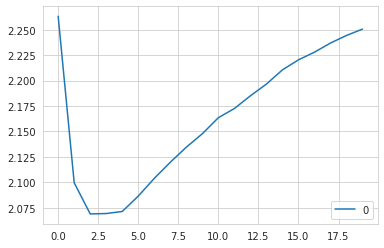

In [140]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [141]:
from sklearn.neighbors import KNeighborsClassifier

#Traiing
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [142]:
#Prediction
y_pred = classifier.predict(X_test)

In [143]:
y_pred

array([ 0,  0,  0, ..., 11,  0,  0])

In [144]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Calculate the confusion matrix, recall, percision and all over accuracy of the model
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[17818    28   334   154]
 [  271    60    83    11]
 [  953    20  1147    74]
 [  493     7   170   611]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     18334
           4       0.52      0.14      0.22       425
           6       0.66      0.52      0.58      2194
          11       0.72      0.48      0.57      1281

    accuracy                           0.88     22234
   macro avg       0.70      0.53      0.58     22234
weighted avg       0.87      0.88      0.87     22234

Accuracy: 0.883151929477377


In [145]:
from sklearn.metrics import classification_report, confusion_matrix
cf =confusion_matrix(y_pred, y_test, labels=[0,6,4,11])
print(confusion_matrix(y_pred, y_test, labels=[0,6,4,11]))

[[17818   953   271   493]
 [  334  1147    83   170]
 [   28    20    60     7]
 [  154    74    11   611]]


<Figure size 864x864 with 0 Axes>

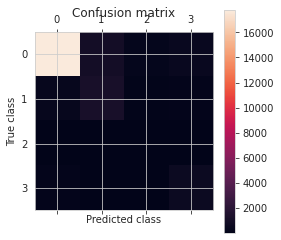

In [161]:
#confusion matrix creation
LABELS=['0','4','6','11']
conf_matrix=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(12,12))
plt.matshow(cf)
plt.colorbar()
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()



In [162]:
#Comparing Error rate with k-value
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

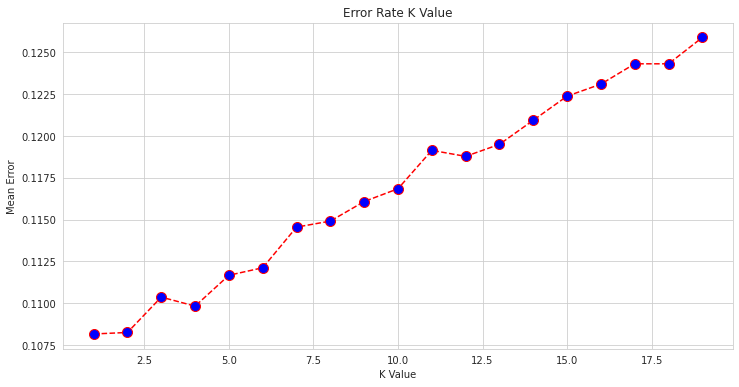

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [164]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [165]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy Rate :",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy Rate : 87.76198614734191
